
# Decision Tree & SVM


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import csv
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler

### Data Importation
import the 10% of the entire dataset

In [2]:
# training dataset
col_names = ["duration","protocol_type","service","flag","src_bytes",
             "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
             "logged_in","num_compromised","root_shell","su_attempted","num_root",
             "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
             "is_host_login","is_guest_login","count","srv_count","serror_rate",
             "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
             "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
             "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
             "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
             "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]
train_data = pd.read_csv("./kddcup.data_10_percent", header=None, names = col_names)
train_data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,494011,494012,494013,494014,494015,494016,494017,494018,494019,494020
duration,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
protocol_type,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,...,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp
service,http,http,http,http,http,http,http,http,http,http,...,http,http,http,http,http,http,http,http,http,http
flag,SF,SF,SF,SF,SF,SF,SF,SF,SF,SF,...,SF,SF,SF,SF,SF,SF,SF,SF,SF,SF
src_bytes,181,239,235,219,217,217,212,159,210,212,...,308,291,289,306,289,310,282,203,291,219
dst_bytes,5450,486,1337,1337,2032,2032,1940,4087,151,786,...,662,1862,244,662,1862,1881,2286,1200,1200,1234
land,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wrong_fragment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
urgent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hot,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# testing dataset
test_data = pd.read_csv("./corrected", header=None, names = col_names)
test_data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,311019,311020,311021,311022,311023,311024,311025,311026,311027,311028
duration,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
protocol_type,udp,udp,udp,udp,udp,udp,udp,udp,udp,tcp,...,udp,udp,udp,udp,udp,udp,udp,udp,udp,udp
service,private,private,private,private,private,private,domain_u,private,private,http,...,private,private,private,private,private,private,private,private,private,private
flag,SF,SF,SF,SF,SF,SF,SF,SF,SF,SF,...,SF,SF,SF,SF,SF,SF,SF,SF,SF,SF
src_bytes,105,105,105,105,105,105,29,105,105,223,...,105,105,105,105,105,105,105,105,105,105
dst_bytes,146,146,146,146,146,146,0,146,146,185,...,105,105,105,105,105,147,147,147,147,147
land,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wrong_fragment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
urgent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hot,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Exploration
Analyze the data. As we can see, the majority columns are numeric attributes, only 4 columns are catogorical

In [4]:
# analyze the data, 38 numeric collumns
train_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Check the column cardinality. If the categorical column has too many categorical values (high cardinality), might end up with feature too sparse, better remove those features. We choose to remove 'service', 'flag', and keep the 'protocol_type', 'label'. 'label' will be replaced with 0 (normal), 1 (has attack)

In [5]:
# protocol_type has 3 categorical values
train_data['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [6]:
# protocol_type has 66 categorical values, need to remove
train_data['service'].value_counts()

ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
red_i           1
tftp_u          1
pm_dump         1
Name: service, Length: 66, dtype: int64

In [7]:
# flag has 11 categorical values, need to remove
train_data['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

Check for missing values. If a column has too many missing values, we need to remove this attribute.
Results show that there are none missing values.

In [8]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
print(missing_values_table(train_data))

Your selected dataframe has 42 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


Data Exploration. show different types of attacks, and show the distribution in graphs. 

In [10]:
# calculate different attack types
train_data['label'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

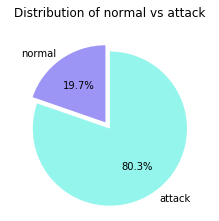

In [11]:
# Pie chart to show normal vs. attacks
colors = ["#9d95f5", "#93f5eb"]
labels = ['normal', 'attack']
sizes = [97278, 494020-97278]
explode = (0.05, 0.05)  
plt.pie(sizes, explode =explode ,labels=labels, autopct='%1.1f%%', colors=colors, shadow=False, startangle=90)
plt.axis('equal')
plt.title('Distribution of normal vs attack\n')
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(3,3)
plt.show()

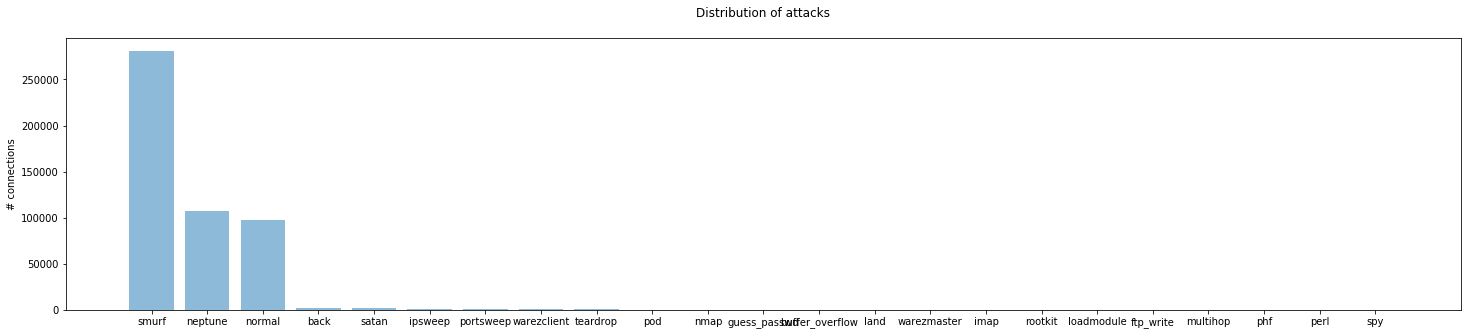

In [12]:
# Bar graph to show distribution of different attack types
objects = ('smurf', 'neptune', 'normal', 'back', 'satan', 'ipsweep', 'portsweep', 'warezclient', 'teardrop', 'pod', 'nmap', 
           'guess_passwd', 'buffer_overflow', 'land', 'warezmaster', 'imap', 'rootkit', 'loadmodule', 'ftp_write', 'multihop',
          'phf', 'perl', 'spy')
y_pos = np.arange(len(objects))
sizes = [280790, 107201, 97278, 2203, 1589, 1247, 1040, 1020, 979, 264, 231, 53, 30, 21, 20, 12, 10, 9, 8, 7, 4, 3, 2]
plt.bar(y_pos, sizes, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('# connections')
plt.title('Distribution of attacks\n')
fig = plt.gcf()
fig.set_size_inches(25,5)
plt.show()

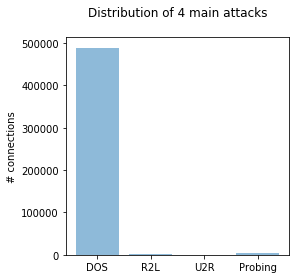

In [13]:
# Bar graph to show distribution of 4 main attack types
objects = ('DOS', 'R2L', 'U2R', 'Probing')
y_pos = np.arange(len(objects))
sizes = [488735, 1126, 52, 4107]
plt.bar(y_pos, sizes, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('# connections')
plt.title('Distribution of 4 main attacks\n')
fig = plt.gcf()
fig.set_size_inches(4,4)
plt.show()

### Data Preprocessing
Map the catogorical data ('protocol_type') into new dataset, drop 'service', 'flag' columns, replace 'label' column as 0 (normal), 1(has attack)

In [14]:
# replace encoded data 
clean_protocol_type = {"protocol_type":{"tcp": 1, "icmp": 2, "udp": 3}}
train_data.replace(clean_protocol_type, inplace=True)
train_data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,494011,494012,494013,494014,494015,494016,494017,494018,494019,494020
duration,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
protocol_type,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
service,http,http,http,http,http,http,http,http,http,http,...,http,http,http,http,http,http,http,http,http,http
flag,SF,SF,SF,SF,SF,SF,SF,SF,SF,SF,...,SF,SF,SF,SF,SF,SF,SF,SF,SF,SF
src_bytes,181,239,235,219,217,217,212,159,210,212,...,308,291,289,306,289,310,282,203,291,219
dst_bytes,5450,486,1337,1337,2032,2032,1940,4087,151,786,...,662,1862,244,662,1862,1881,2286,1200,1200,1234
land,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wrong_fragment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
urgent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hot,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# convert 'label' column into 0,1
train_data['label'][train_data['label']!='normal.'] = 'attack'  # end with .
train_data['label'][train_data['label']=='normal.'] = 0
train_data['label'][train_data['label']=='attack'] = 1
train_data[['label']] = train_data[['label']].apply(pd.to_numeric)
train_data['label'].value_counts()

1    396743
0     97278
Name: label, dtype: int64

In [19]:
# drop service, flag features, convert all attributes into float type
col_clean = ["duration","protocol_type","src_bytes",
             "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
             "logged_in","num_compromised","root_shell","su_attempted","num_root",
             "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
             "is_host_login","is_guest_login","count","srv_count","serror_rate",
             "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
             "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
             "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
             "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
             "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]
train_data_clean = train_data[col_clean].astype(float)
train_data_clean.transpose()

,0,1,2,3,4,5,6,7,8,9,...,494011,494012,494013,494014,494015,494016,494017,494018,494019,494020
duration,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
protocol_type,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
src_bytes,181.00,239.00,235.00,219.00,217.00,217.00,212.00,159.00,210.00,212.00,...,308.00,291.00,289.00,306.00,289.00,310.00,282.00,203.00,291.00,219.00
dst_bytes,5450.00,486.00,1337.00,1337.00,2032.00,2032.00,1940.00,4087.00,151.00,786.00,...,662.00,1862.00,244.00,662.00,1862.00,1881.00,2286.00,1200.00,1200.00,1234.00
land,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
wrong_fragment,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
urgent,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
hot,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
num_failed_logins,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
logged_in,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [23]:
# Apply feature scaling to standardize the training sets.
mmsc = MinMaxScaler()
mmsc.fit(train_data_clean)
train_data_clean_norm = mmsc.transform(train_data_clean)
train_data_clean_norm.transpose()

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.61041764e-07, 3.44690506e-07, 3.38921627e-07, ...,
        2.92770597e-07, 4.19685930e-07, 3.15846112e-07],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [28]:
# do the same process for the testing dataset
# encode for protocol
test_data.replace(clean_protocol_type, inplace=True)
# replace label column with 0/1
test_data['label'][test_data['label']!='normal.'] = 'attack'  # end with .
test_data['label'][test_data['label']=='normal.'] = 0
test_data['label'][test_data['label']=='attack'] = 1
test_data[['label']] = test_data[['label']].apply(pd.to_numeric)
# drop service, flag features, convert all attributes into float type
test_data_clean = test_data[col_clean].astype(float)
#test_data_clean.transpose()
mmsc.fit(test_data_clean)
test_data_clean_norm = mmsc.transform(test_data_clean)
test_data_clean_norm.transpose()

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.67129195e-06, 1.67129195e-06, 1.67129195e-06, ...,
        1.67129195e-06, 1.67129195e-06, 1.67129195e-06],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

### Training, Testing Dataset

In [30]:
# for training dataset
#array = train_data_clean.values
train_feature = train_data_clean_norm[:,0:39]
train_label = train_data_clean_norm[:,39]
print(train_feature)
print(train_label)

[[0.00000000e+00 0.00000000e+00 2.61041764e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.44690506e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.38921627e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 2.92770597e-07 ... 1.00000000e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.19685930e-07 ... 1.00000000e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.15846112e-07 ... 1.00000000e-02
  0.00000000e+00 0.00000000e+00]]
[0. 0. 0. ... 0. 0. 0.]


In [31]:
# for testing dataset
#array = test_data_clean.values
test_feature = test_data_clean_norm[:,0:39]
test_label = test_data_clean_norm[:,39]
print(test_feature)
print(test_label)

[[0.00000000e+00 1.00000000e+00 1.67129195e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 1.67129195e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 1.67129195e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 1.00000000e+00 1.67129195e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 1.67129195e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 1.67129195e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[0. 0. 0. ... 0. 0. 0.]


In [97]:
# Array for storing classifier and scores
Classifier = []
Accuracy = []
Precision = []
Recall = []
F1score = []

### Decision Tree
The result with data normalization is higher than without normalization

When the max depth is:  15
The Decision Tree Accuracy is =  92.68878464709078  %
The Decision Tree Precision is =  0.730977166497846
The Decision Tree Recall is =  0.9885135246645652
The Decision Tree F1-score is =  0.840459118526106
When the max depth is:  16
The Decision Tree Accuracy is =  94.396985490099  %
The Decision Tree Precision is =  0.7808019567536624
The Decision Tree Recall is =  0.9904444407769875
The Decision Tree F1-score is =  0.8732166890982503
When the max depth is:  17
The Decision Tree Accuracy is =  92.38816959190301  %
The Decision Tree Precision is =  0.7237780040733197
The Decision Tree Recall is =  0.985311834700378
The Decision Tree F1-score is =  0.8345342847757564
When the max depth is:  18
The Decision Tree Accuracy is =  92.67721016368249  %
The Decision Tree Precision is =  0.7285595135925733
The Decision Tree Recall is =  0.9947188619147427
The Decision Tree F1-score is =  0.8410851090551346
When the max depth is:  19
The Decision Tree Accuracy is =  9

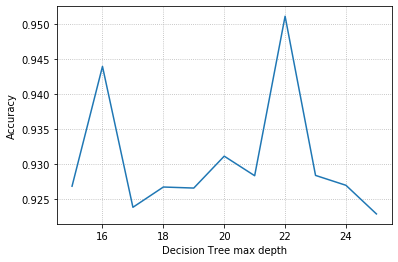

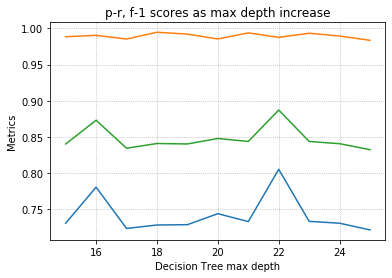

In [68]:
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

max_depth_value = list()
accuracy_scores = list()
precision_scores = list()
recall_scores = list()
f1_scores = list()
highest_accuracy = 0

# do decision tree with max_depth from 15-25
for max_depth in range(15, 26):
    clf = tree.DecisionTreeClassifier(splitter = "random", criterion = "entropy", max_depth=max_depth)
    clf.fit(train_feature, train_label)
    prediction = clf.predict(test_feature)
    accuracy = accuracy_score(prediction, test_label)
    
    if (accuracy > highest_accuracy):
        highest_accuracy = accuracy
        prediction_result = prediction
    
    print("When the max depth is: ", max_depth)
    matrix = confusion_matrix(test_label, prediction)
    # print(matrix)
    precision = matrix[0][0]/(matrix[0][0]+matrix[1][0])
    recall = matrix[0][0]/(matrix[0][0]+matrix[0][1])
    f1score = (matrix[0][0]*2)/(matrix[0][0]*2+matrix[1][0]+matrix[0][1])
    print("The Decision Tree Accuracy is = ", accuracy*100, " %")
    print("The Decision Tree Precision is = ", precision)
    print("The Decision Tree Recall is = ", recall)
    print("The Decision Tree F1-score is = ", f1score)

    max_depth_value.append(max_depth)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1score)

# plotting graph here
plt.plot(max_depth_value, accuracy_scores)
plt.xlabel('Decision Tree max depth')
plt.ylabel('Accuracy')
plt.grid(linestyle='dotted')
plt.savefig('decisionTreeAccuracy.png')
plt.show()

plt.plot(max_depth_value, precision_scores, label="precision")
plt.plot(max_depth_value, recall_scores, label="recall")
plt.plot(max_depth_value, f1_scores, label="f1-score")
plt.xlabel('Decision Tree max depth')
plt.ylabel('Metrics')
plt.title('p-r, f-1 scores as max depth increase')
plt.grid(linestyle='dotted')
plt.savefig('decisionTreePR.png')
plt.show()

In [98]:
# Show the highest result
accuracy = accuracy_score(prediction_result, test_label)
matrix = confusion_matrix(test_label, prediction_result)
# print(matrix)
precision = matrix[0][0]/(matrix[0][0]+matrix[1][0])
recall = matrix[0][0]/(matrix[0][0]+matrix[0][1])
f1score = (matrix[0][0]*2)/(matrix[0][0]*2+matrix[1][0]+matrix[0][1])
print("The Decision Tree Accuracy is = ", accuracy*100, " %")
print("The Decision Tree Precision is = ", precision)
print("The Decision Tree Recall is = ", recall)
print("The Decision Tree F1-score is = ", f1score)
report = classification_report(test_label, prediction_result)
print(report)

# store the metrics into arrays
Classifier.append("Decision tree Classifier")
Accuracy.append(accuracy)
Precision.append(precision)
Recall.append(recall)
F1score.append(f1score)

The Decision Tree Accuracy is =  95.11267438084552  %
The Decision Tree Precision is =  0.8054725564618159
The Decision Tree Recall is =  0.9876553397257108
The Decision Tree F1-score is =  0.8873090124619137
              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89     60593
         1.0       1.00      0.94      0.97    250436

    accuracy                           0.95    311029
   macro avg       0.90      0.96      0.93    311029
weighted avg       0.96      0.95      0.95    311029



In [71]:
# other metrics
from sklearn.metrics import hamming_loss, jaccard_similarity_score, matthews_corrcoef, zero_one_loss
hamming_loss = hamming_loss(test_label, prediction_result)
print("Hamming Loss {}".format(hamming_loss))
jaccard_similarity_score = jaccard_similarity_score(test_label, prediction_result)
print("Jaccard Similarity Score {}".format(jaccard_similarity_score))
matthews_corrcoef = matthews_corrcoef(test_label, prediction_result)
print("Matthews corrcoef {}".format(matthews_corrcoef))
zero_one_loss = zero_one_loss(test_label, prediction_result)
print("nZero-One Loss {}".format(zero_one_loss))

Hamming Loss 0.04887325619154484
Jaccard Similarity Score 0.9511267438084552
Matthews corrcoef 0.8637742838608623
nZero-One Loss 0.04887325619154481


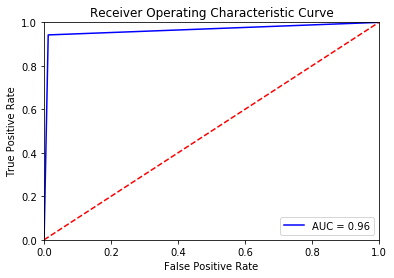

In [73]:
# Show ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, threshold = metrics.roc_curve(test_label, prediction_result)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Support Vector Machine
we use 4 differnent SVM classfiers: SVC with linear kernel function, SVC with rbf (Radial basis function kernel) kernel, SVC with polynomial (degree 3) kernel, LinearSVC (linear kernel); It takes a long time to train. Results show that SVM with LinearSVC (linear kernel) has the best performance.

In [ ]:
from sklearn import svm
X = train_feature
Y = train_label

C = 1.0  # SVM regularization parameter
# apply different kernel functions
svc = svm.SVC(kernel='linear', C=C).fit(X, Y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, Y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, Y)
lin_svc = svm.LinearSVC(C=C).fit(X, Y)

In [85]:
# test dataset output
svc_test_result = svc.predict(test_feature); 
rbf_svc_test_result = rbf_svc.predict(test_feature);
poly_svc_test_result = poly_svc.predict(test_feature);
lin_svc_test_result = lin_svc.predict(test_feature);

In [86]:
# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

accuracy = accuracy_score(svc_test_result, test_label)
print("The SVC with linear kernel Accuracy is = ", accuracy*100, " %")
matrix = confusion_matrix(test_label, svc_test_result)
precision = matrix[0][0]/(matrix[0][0]+matrix[1][0])
recall = matrix[0][0]/(matrix[0][0]+matrix[0][1])
f1score = (matrix[0][0]*2)/(matrix[0][0]*2+matrix[1][0]+matrix[0][1])
print("The SVC with linear kernel Precision is = ", precision)
print("The SVC with linear kernel Recall is = ", recall)
print("The SVC with linear kernel F1-score is = ", f1score)
report = classification_report(test_label, svc_test_result)
print(report)

accuracy = accuracy_score(rbf_svc_test_result, test_label)
print("The SVC with RBF kernel Accuracy is = ", accuracy*100, " %")
matrix = confusion_matrix(test_label, rbf_svc_test_result)
precision = matrix[0][0]/(matrix[0][0]+matrix[1][0])
recall = matrix[0][0]/(matrix[0][0]+matrix[0][1])
f1score = (matrix[0][0]*2)/(matrix[0][0]*2+matrix[1][0]+matrix[0][1])
print("The SVC with RBF kernel Precision is = ", precision)
print("The SVC with RBF kernel Recall is = ", recall)
print("The SVC with RBF kernel F1-score is = ", f1score)
report = classification_report(test_label, rbf_svc_test_result)
print(report)

accuracy = accuracy_score(poly_svc_test_result, test_label)
print("The SVC with polynomial (degree 3) kernel Accuracy is = ", accuracy*100, " %")
matrix = confusion_matrix(test_label, poly_svc_test_result)
precision = matrix[0][0]/(matrix[0][0]+matrix[1][0])
recall = matrix[0][0]/(matrix[0][0]+matrix[0][1])
f1score = (matrix[0][0]*2)/(matrix[0][0]*2+matrix[1][0]+matrix[0][1])
print("The SVC with polynomial (degree 3) kernel Precision is = ", precision)
print("The SVC with polynomial (degree 3) kernel Recall is = ", recall)
print("The SVC with polynomial (degree 3) kernel F1-score is = ", f1score)
report = classification_report(test_label, poly_svc_test_result)
print(report)

accuracy = accuracy_score(lin_svc_test_result, test_label)
print("The SVM with LinearSVC (linear kernel) Accuracy is = ", accuracy*100, " %")
matrix = confusion_matrix(test_label, lin_svc_test_result)
precision = matrix[0][0]/(matrix[0][0]+matrix[1][0])
recall = matrix[0][0]/(matrix[0][0]+matrix[0][1])
f1score = (matrix[0][0]*2)/(matrix[0][0]*2+matrix[1][0]+matrix[0][1])
print("The SVM with LinearSVC (linear kernel) Precision is = ", precision)
print("The SVM with LinearSVC (linear kernel) Recall is = ", recall)
print("The SVM with LinearSVC (linear kernel) F1-score is = ", f1score)
report = classification_report(test_label, lin_svc_test_result)
print(report)

The SVC with linear kernel Accuracy is =  92.16889743400132  %
The SVC with linear kernel Precision is =  0.718178752920209
The SVC with linear kernel Recall is =  0.9842556070833265
The SVC with linear kernel F1-score is =  0.8304243394715772
              precision    recall  f1-score   support

         0.0       0.72      0.98      0.83     60593
         1.0       1.00      0.91      0.95    250436

    accuracy                           0.92    311029
   macro avg       0.86      0.95      0.89    311029
weighted avg       0.94      0.92      0.93    311029

The SVC with RBF kernel Accuracy is =  92.10780988267975  %
The SVC with RBF kernel Precision is =  0.7130327888229593
The SVC with RBF kernel Recall is =  0.9955605432970805
The SVC with RBF kernel F1-score is =  0.8309377044664072
              precision    recall  f1-score   support

         0.0       0.71      1.00      0.83     60593
         1.0       1.00      0.90      0.95    250436

    accuracy                    

In [99]:
# Show the highest result
accuracy = accuracy_score(lin_svc_test_result, test_label)
matrix = confusion_matrix(test_label, lin_svc_test_result)
# print(matrix)
precision = matrix[0][0]/(matrix[0][0]+matrix[1][0])
recall = matrix[0][0]/(matrix[0][0]+matrix[0][1])
f1score = (matrix[0][0]*2)/(matrix[0][0]*2+matrix[1][0]+matrix[0][1])
print("The SVM Accuracy is = ", accuracy*100, " %")
print("The SVM Precision is = ", precision)
print("The SVM Recall is = ", recall)
print("The SVM F1-score is = ", f1score)
report = classification_report(test_label, lin_svc_test_result)
print(report)

# store the metrics into arrays
Classifier.append("SVM Classifier")
Accuracy.append(accuracy)
Precision.append(precision)
Recall.append(recall)
F1score.append(f1score)

The SVM Accuracy is =  92.21615990791855  %
The SVM Precision is =  0.7192090327400678
The SVM Recall is =  0.9850147706830822
The SVM F1-score is =  0.8313832010029252
              precision    recall  f1-score   support

         0.0       0.72      0.99      0.83     60593
         1.0       1.00      0.91      0.95    250436

    accuracy                           0.92    311029
   macro avg       0.86      0.95      0.89    311029
weighted avg       0.94      0.92      0.93    311029



In [88]:
# other metrics
from sklearn.metrics import hamming_loss, jaccard_similarity_score, matthews_corrcoef, zero_one_loss
hamming_loss = hamming_loss(test_label, lin_svc_test_result)
print("Hamming Loss {}".format(hamming_loss))
jaccard_similarity_score = jaccard_similarity_score(test_label, lin_svc_test_result)
print("Jaccard Similarity Score {}".format(jaccard_similarity_score))
matthews_corrcoef = matthews_corrcoef(test_label, lin_svc_test_result)
print("Matthews corrcoef {}".format(matthews_corrcoef))
zero_one_loss = zero_one_loss(test_label, lin_svc_test_result)
print("nZero-One Loss {}".format(zero_one_loss))

Hamming Loss 0.07783840092081445
Jaccard Similarity Score 0.9221615990791855
Matthews corrcoef 0.798724369785714
nZero-One Loss 0.07783840092081451


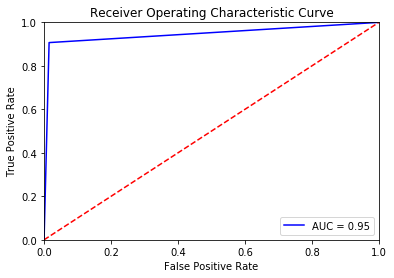

In [89]:
# Show ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, threshold = metrics.roc_curve(test_label, lin_svc_test_result)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Result Overview

In [105]:
# compare different classifiers
result = pd.DataFrame(index=[1,2])
result["Classifier"] = Classifier
result["Accuracy"] = Accuracy
result["Precision"] = Precision
result["Recall"] = Recall
result["Classifier"] = Classifier
result["F1-score"] = F1score
result.set_index("Classifier")

,Accuracy,Precision,Recall,F1-score
Classifier,,,,
Decision tree Classifier,0.951127,0.805473,0.987655,0.887309
SVM Classifier,0.922162,0.719209,0.985015,0.831383


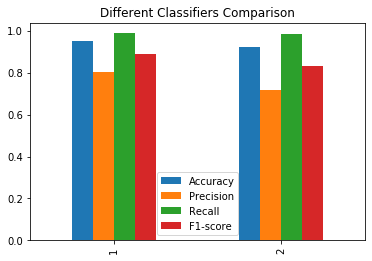

In [106]:
result.plot(kind = "bar", title="Different Classifiers Comparison")